In [1]:
import os
import pickle
import glob
import skimage
import skimage.transform
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import csv

import sys

sys.path.append('../functions')

import chirp_functions as proc
%matplotlib inline

In [2]:
header = []
#freqs = np.array(list(np.linspace(1,16,76))+list(np.linspace(16,17, 51))+list(np.linspace(17,18,6)))

freqs = np.linspace(2.0, 17.0, 650) # need to change this to match the frequencies in your COMSOL simulation
print(freqs)

setno = 0
targetfile = '../../data/kagome-0304-realspace/preprocessed/' # need to change this to match the destination



with open('../../data/kagome-0304-realspace/real_space_triangle.csv', newline='') as csvfile: # need to match the filepath of the COMSOL data
    reader = csv.reader(csvfile, delimiter=',')

    headerNum = 4
    for i in range(headerNum):
        next(reader)
        
    header = next(reader)
    dataPointNum = int((len(header)-1)/4)
    
    j=0
    for row in reader:
        real_data = []
        freq = freqs[j]
        
        for i in range(1, dataPointNum+1, 1):
            currentData = [float(row[i+dataPointNum*2]), float(row[i+dataPointNum*3]), float(row[i]), float(row[i+dataPointNum])/2/np.pi*360]
            real_data.append(currentData)
            
        np.array(real_data).dump(targetfile + '_' + str(freq) + '_' + str(setno) + '.pkl')
        
        j+=1

[ 2.          2.02311248  2.04622496  2.06933744  2.09244992  2.1155624
  2.13867488  2.16178737  2.18489985  2.20801233  2.23112481  2.25423729
  2.27734977  2.30046225  2.32357473  2.34668721  2.36979969  2.39291217
  2.41602465  2.43913713  2.46224961  2.4853621   2.50847458  2.53158706
  2.55469954  2.57781202  2.6009245   2.62403698  2.64714946  2.67026194
  2.69337442  2.7164869   2.73959938  2.76271186  2.78582435  2.80893683
  2.83204931  2.85516179  2.87827427  2.90138675  2.92449923  2.94761171
  2.97072419  2.99383667  3.01694915  3.04006163  3.06317411  3.08628659
  3.10939908  3.13251156  3.15562404  3.17873652  3.201849    3.22496148
  3.24807396  3.27118644  3.29429892  3.3174114   3.34052388  3.36363636
  3.38674884  3.40986133  3.43297381  3.45608629  3.47919877  3.50231125
  3.52542373  3.54853621  3.57164869  3.59476117  3.61787365  3.64098613
  3.66409861  3.68721109  3.71032357  3.73343606  3.75654854  3.77966102
  3.8027735   3.82588598  3.84899846  3.87211094  3.

In [4]:
print(dataPointNum)

25


In [24]:
with open('../../data/FT_debug/1cavity3.pkl', 'rb') as f:
    data = pickle.load(f)
    
print(data)

[[  -990.87308308 +188.12801396j   3378.67950282 +623.87989246j
   -3060.2042817 +1131.72764666j  -3088.7954352  +326.41186677j
   -2521.8003581  -198.20710182j   4093.6262653  +656.10417211j
   -2966.8878212  -685.39766682j]
 [  8119.07397952 +337.99186766j  -5355.96997338 -196.3589458j
   -2501.20568837 -519.30073891j   8249.60783024  +72.19494522j
   -4560.85536336 -968.40080803j  -6126.00780685-1237.35948422j
    9509.38588564 +179.8844065j ]
 [ -6773.22748363 -488.69235285j  -2572.62710972 -848.95155491j
   -6236.50396533-1224.56223005j  21771.98591303 +160.78506201j
  -14459.75809285-1166.52145337j  -5034.05301688-1673.11046543j
    9286.19149918 -341.5744362j ]
 [ -2732.03511577 -854.21074259j   8317.73960592 +116.63509351j
   -4112.54244822 -888.32739782j -16805.87071671-1508.73495414j
   21591.98102545  -47.18529249j  -4185.21288116 -885.77589098j
   -2977.92873114-1555.75680908j]
 [ -2519.34252853 -272.22254374j  -5973.38492861 -621.69053371j
    8824.38883465 +334.71356792j 

In [12]:
# For FT program debug use


header = []
#freqs = np.linspace(2,16,300)
#setno = 0
targetfile = '../../data/FT_debug/'

size = 7 # 7*7 matrix
dataNum = size**2
'''
Data: Amplitude (Pa), phase (rad), x coord (m), y coord (m)

'''

cavityNum = 1
with open(f'../../data/FT_debug/raw/5kHz_1cavity{cavityNum}.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')

    headerNum = 4
    for i in range(headerNum):
        next(reader)
        
    header = next(reader)
    
    
    real_data = np.zeros((size, size), dtype = complex)
    
    data = next(reader)
    countStart = 1
    for i in range(size):
        countStart += i
        count = countStart
        for j in range(size):
            print(count)
            real_data[i][j] = float(data[count]) * np.exp(-1j * float(data[count+dataNum]))
            
            if j >= 6-i:
                count += 14-j-i-1
            else:
                
                count += j+i+2
            
            
    #real_data.dump(targetfile + '1cavity3.pkl')
    np.save(f'../../data/FT_debug/preprocessed/5kHz_1cavity{cavityNum}.npy', real_data)


1
3
6
10
15
21
28
2
5
9
14
20
27
34
4
8
13
19
26
33
39
7
12
18
25
32
38
43
11
17
24
31
37
42
46
16
23
30
36
41
45
48
22
29
35
40
44
47
49


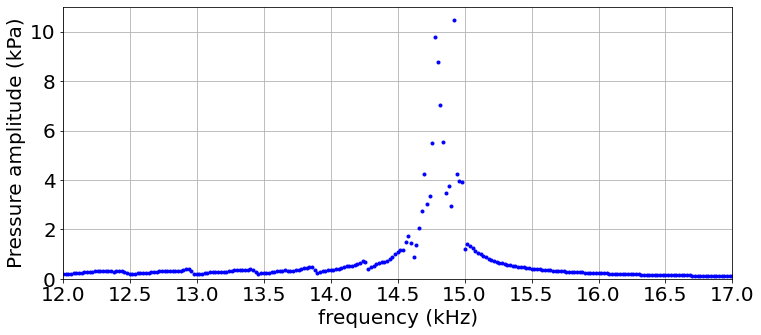

In [17]:
import csv
from matplotlib import pyplot as plt
import numpy as np

with open('../../data/simulation/kagome_airDamping.csv', newline='') as csvfile: # need to match the filepath of the COMSOL data
    reader = csv.reader(csvfile, delimiter=',')
    header = next(reader)
    real_data = []
    
    for row in reader:       
        currentData = [float(row[0]), float(row[1])]
        real_data.append(currentData)

data = np.array(real_data)
freq = data[:,0]
amplitude = data[:,1]
plt.figure(figsize=(12,5))
plt.plot(freq, amplitude/1000, 'b.')
plt.axis([12, 17, 0, 11])
plt.grid()
plt.xlabel("frequency (kHz)", fontsize = 20)
plt.ylabel("Pressure amplitude (kPa)", fontsize = 20)
plt.xticks(np.linspace(12, 17, 11), fontsize = 20)
plt.yticks(fontsize = 20)
plt.savefig("../../data/simulation/response_airDamping.png")